<a href="https://colab.research.google.com/github/sbowma15/saliency_metrics_comparison/blob/main/saliency_metrics_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'MSE: 0.0000, PSNR: inf, SSIM: 1.0000')

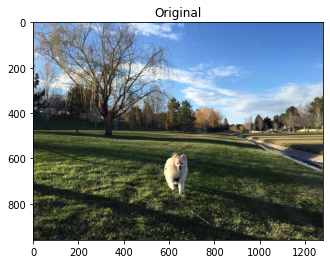

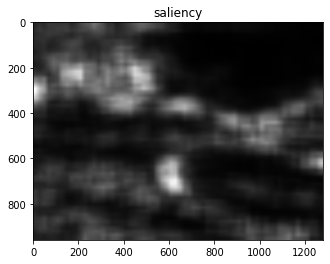

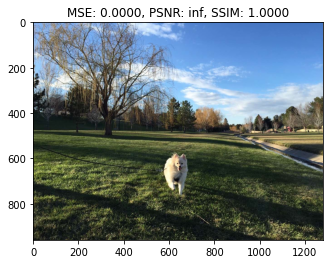

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import random

def SSIM(img1, img2):
  C1 = (0.01 * 255)**2
  C2 = (0.03 * 255)**2
  img1 = img1.astype(np.float64)
  img2 = img2.astype(np.float64)
  kernel = cv.getGaussianKernel(11, 1.5)
  window = np.outer(kernel, kernel.transpose())
  mu1 = cv.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
  mu2 = cv.filter2D(img2, -1, window)[5:-5, 5:-5]
  mu1_sq = mu1**2
  mu2_sq = mu2**2
  mu1_mu2 = mu1 * mu2
  sigma1_sq = cv.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
  sigma2_sq = cv.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
  sigma12 = cv.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2
  ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))
  return ssim_map.mean()

def PSNR(img1, img2):
  # img1 and img2 have range [0, 255]
    img1[0,255]
    img2[0,255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
      return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

def MSE(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)

    return mse

##############################################################################
#                           Main Program
###############################################################################
imA =cv.imread("/content/sample_data/Saliency0.jpg")

imA = cv.cvtColor(imA, cv.COLOR_BGR2RGB)
length = imA.shape[0]
width = imA.shape[1]
saliency = cv.saliency.StaticSaliencySpectralResidual_create()
# saliency map values are between 0-1
success, sal_map = saliency.computeSaliency(imA)

plt.figure()
plt.imshow(imA)
plt.title("Original")
plt.figure()
plt.imshow(sal_map,cmap='gray')
plt.title("saliency")

mseV = MSE(imA,imA)
psnrV = PSNR(imA,imA)
ssimV = SSIM(imA,imA)

plt.figure()
plt.imshow(imA,cmap='gray')
plt.title("MSE: %.4f, PSNR: %.4f, SSIM: %.4f" % (mseV, psnrV, ssimV))